<a href="https://colab.research.google.com/github/jnragu/ee608_exam2/blob/main/Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3: Collect the stock price for Tesla (NASDAQ: TSLA) for the past 30 days. 

In [ ]:
! pip install yfinance 

In [105]:
import yfinance as yf

tickerSymbol = 'TSLA'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period = '1d', start = '2021-03-08', end = '2021-04-21')

closing_price = tickerDf[['Close']]

tickerDf.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-08,600.549988,620.130005,558.789978,563.000000,51787000,0,0
2021-03-09,608.179993,678.090027,595.210022,673.580017,67523300,0,0
2021-03-10,700.299988,717.849976,655.059998,668.059998,60605700,0,0
2021-03-11,699.400024,702.500000,677.179993,699.599976,36253900,0,0
2021-03-12,670.000000,694.880005,666.140015,693.729980,33583800,0,0


## Part (a): Plot the data (date vs. stock price)

Text(0.5, 1.0, "Tesla's closing price for the past 30 days")

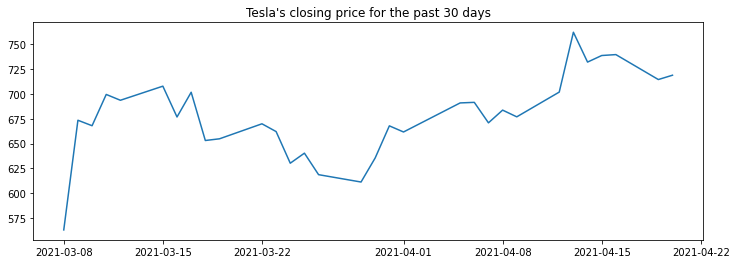

In [106]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator 
import matplotlib.pyplot as plt

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

plt.figure(figsize = (12, 4))
ax = plt.axes() 
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.plot(closing_price.index, closing_price['Close'])
plt.title('Tesla\'s closing price for the past 30 days')

## Part (b): Implement the stochastic gradient descent algorithm to fit a linear regression model for this data set. 

### Using the previous days price to predict the current day's price

In [107]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

prices = closing_price['Close'].to_numpy().reshape(len(closing_price), )

x = prices[:-1].reshape(-1,1)
y = prices[1:].reshape(-1,1)

# Scale the x values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Stochastic Gradient Descent model using squared loss and l2-norm
sgd_model = SGDRegressor(loss = 'squared_loss', penalty = 'l2')
sgd_model.fit(x_scaled, y)

# Make predictions
predictions = sgd_model.predict(x_scaled)

predictions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([612.45275096, 679.90819381, 676.5409004 , 695.7807526 ,
       692.19996893, 700.8682921 , 681.92123507, 697.12889863,
       667.45166555, 668.4948042 , 677.72433053, 672.94179841,
       653.48845594, 659.66180235, 646.43668677, 641.91035043,
       656.75202002, 676.4615955 , 672.69170874, 690.56513383,
       690.91284671, 678.31602698, 686.1425268 , 682.00664608,
       697.23259072, 734.04089786, 715.68553728, 719.72383203,
       720.29117852, 704.94929235])

### Using the previous three days price to predict the current day's price

In [108]:
import numpy as np 

# Function that takes a time series and transforms it 
# Returns X and y values with X being the previous t days values

def create_dataset(dataset, t):
	dataX, dataY = [], []
	for i in range(len(dataset) - t - 1):
		a = dataset[i:(i + t), 0]
		dataX.append(a)
		dataY.append(dataset[i + t, 0])
	return np.array(dataX), np.array(dataY)
 
X, y = create_dataset(x, 3)

# Scale the x values
scaler_three_days = StandardScaler()
X_scaled = scaler_three_days.fit_transform(X)

# Stochastic Gradient Descent model using squared loss and l2-norm
sgd_model_three_days = SGDRegressor(loss = 'squared_loss', penalty = 'l2')
sgd_model_three_days.fit(X_scaled, y)
predictions_three_days = sgd_model_three_days.predict(X_scaled)
predictions_three_days

array([689.53538818, 693.05214984, 698.67993071, 702.15364551,
       685.13294874, 691.75898566, 669.25843948, 652.8315703 ,
       671.58162376, 670.05204414, 642.94160258, 642.29835045,
       634.80121309, 621.85214619, 640.32472164, 671.19398619,
       672.17366536, 686.10487673, 695.75363757, 676.75906206,
       679.89979288, 681.94991144, 695.67654994, 746.43482548,
       738.34256821, 725.12104652])

## Part (c): Plot the raw data and your linear regression model for visual comparison 

Text(0.5, 1.0, "Tesla's closing price for the past 30 days")

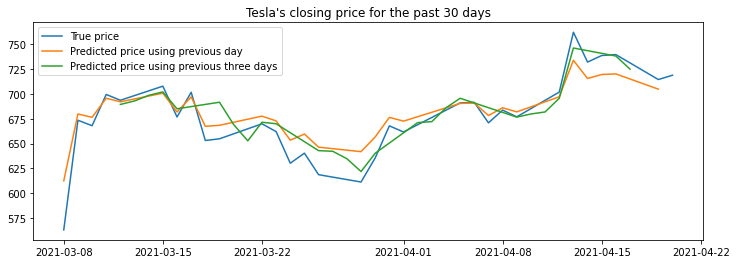

In [109]:
# Find the dates of the predictions
dates = closing_price.index.to_numpy()
dates_predictions_three_days = dates + np.timedelta64(4, 'D')

# Plot
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

plt.figure(figsize = (12, 4))
ax = plt.axes() 
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.plot(closing_price.index, closing_price['Close'], label = 'True price')
ax.plot(dates[: predictions.shape[0]], predictions, label = 'Predicted price using previous day')
ax.plot(dates_predictions_three_days[: predictions_three_days.shape[0]], predictions_three_days, label = 'Predicted price using previous three days')
plt.legend()
plt.title('Tesla\'s closing price for the past 30 days')

## Part (d): What does your model predict for Tesla's stock price for the next three months into the future?

### Future predictions using previous day

In [150]:
future_predictions = []

# Last available price
x = prices[-1].reshape(1, -1)

# Make predictions
for days in range(90): 
  x = sgd_model.predict(x)
  future_predictions.append(x)
  x = scaler.transform(x.reshape(1, -1))

future_predictions = np.array(future_predictions)
print('On ', str(future_predictions_dates[-1])[:10], ' Tesla\'s price will be $', round(future_predictions[-1][0], 2), ' using the previous day\'s price')

On  2021-07-19  Tesla's price will be $ 689.81  using the previous day's price


### Future predictions using previous three days

In [151]:
# Last available prices
x = prices[len(prices) - 4: -1].reshape(1, -1)
x = scaler_three_days.transform(x)

future_predictions_three_days = []

# Make predictions
for days in range(90):
  y = sgd_model_three_days.predict(x)
  future_predictions_three_days.append(y)
  x = np.append(x[0][1:], y)
  x = scaler_three_days.transform(x.reshape(1,-1))

future_predictions_three_days = np.array(future_predictions_three_days)
print('On ', str(future_predictions_dates[-1])[:10], ' Tesla\'s price will be $', round(future_predictions_three_days[-1][0], 2), ' using the previous three day\'s price')

On  2021-07-19  Tesla's price will be $ 393.97  using the previous three day's price


In [ ]:
# Find the dates for the predictions
future_predictions_dates = [dates[-1]]

for days in range(90):
  future_predictions_dates.append(future_predictions_dates[-1] + + np.timedelta64(1, 'D'))

future_predictions_dates = future_predictions_dates[1:]
future_predictions_dates = np.array(future_predictions_dates)

Text(0.5, 1.0, "Tesla's predicted price for three months into the future")

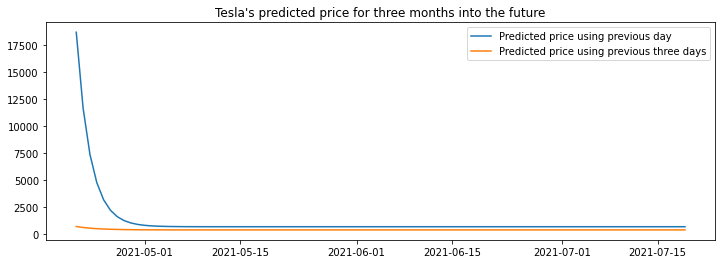

In [130]:
# Plot the predictions
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

plt.figure(figsize = (12, 4))
ax = plt.axes() 
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)
ax.plot(future_predictions_dates, future_predictions, label = 'Predicted price using previous day')
ax.plot(future_predictions_dates, future_predictions_three_days, label = 'Predicted price using previous three days')
plt.legend()
plt.title('Tesla\'s predicted price for three months into the future')